1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
x=np.random.normal(0,1,100)


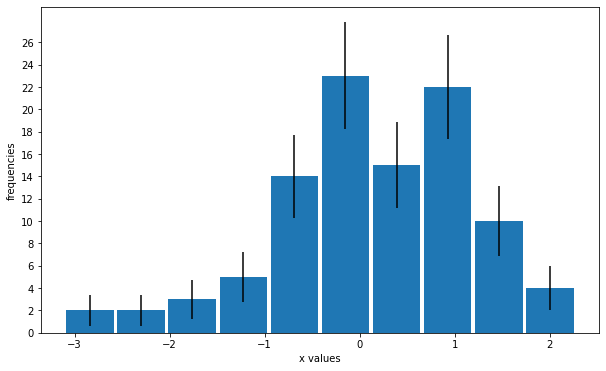

In [35]:
fig, ax = plt.subplots(figsize=(10, 6))

y, bin_edges=np.histogram(x,bins=10)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
ax.bar(bin_centers,y,yerr=y**0.5,width=0.5)
#plt.errorbar(bin_centers,y,yerr = y**0.5, drawstyle='steps')
ax.set_xlabel('x values')
ax.set_ylabel('frequencies')
ax.set_yticks(np.arange(0,28,2))
plt.show()

In [5]:
from scipy.stats import norm


<function matplotlib.pyplot.show(close=None, block=None)>

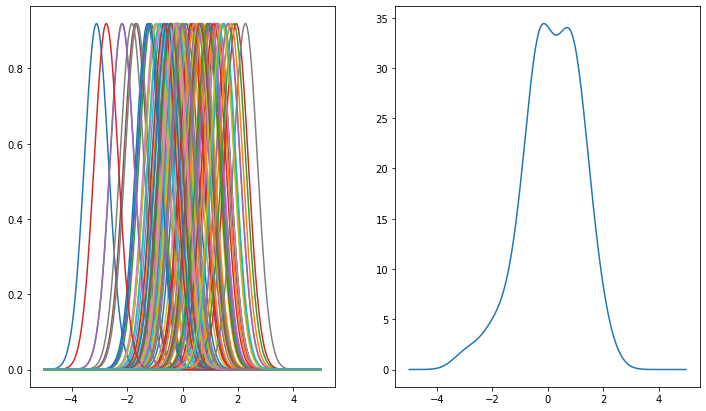

In [51]:
import scipy
stand=1.06*x.std()*x.size**(-1/5)
lista = np.arange(-5, 5, .01)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 7))
lista_gausian=np.zeros((100,len(lista)))
for i in range(len(x)):
    rv = norm(loc = x[i], scale = stand)
    gausian=rv.pdf(lista)
    ax1.plot(lista,gausian)
    lista_gausian[i,:]=gausian
    
suma=np.sum(lista_gausian,axis=0)
ax2.plot(lista,suma)
plt.show

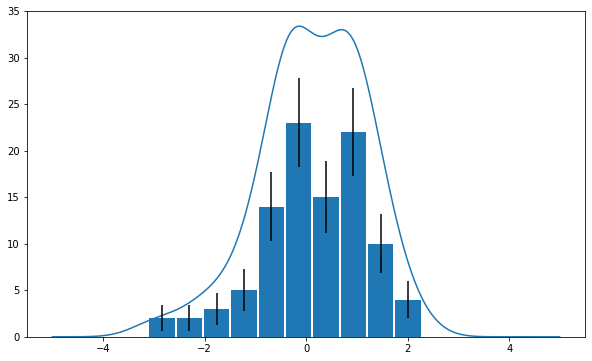

(97.00000000000001, 99.99999343209078)

In [53]:
import scipy

fig, ax = plt.subplots(figsize=(10, 6))
gausians_int=scipy.integrate.trapz(suma,lista)
hist_int=scipy.integrate.trapz(y)
suma_new=suma*hist_int/gausians_int

ax.plot(lista,suma_new)
ax.bar(bin_centers,y,yerr=y**0.5,width=0.5)

plt.show()
scipy.integrate.trapz(suma_new,lista),gausians_int

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

In [94]:
mean_1=[1,1]
mean_2=[-1,-1]

std_1=np.random.random(4)
std_1[1]=std_1[2]
std_1=std_1.reshape(2,2)

std_2=np.random.random(4)
std_2[1]=std_2[2]
std_2=std_2.reshape(2,2)

gaussian_1=np.random.multivariate_normal(mean_1,std_1,200)
gaussian_2=np.random.multivariate_normal(mean_2,std_2,200)


/tmp/ipykernel_115/3368102921.py:12: RuntimeWarning: covariance is not positive-semidefinite.
  gaussian_1=np.random.multivariate_normal(mean_1,std_1,200)
/tmp/ipykernel_115/3368102921.py:13: RuntimeWarning: covariance is not positive-semidefinite.
  gaussian_2=np.random.multivariate_normal(mean_2,std_2,200)


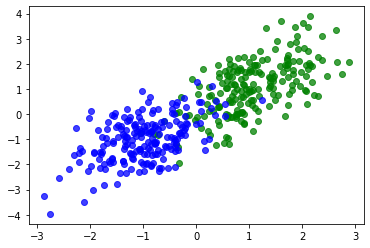

In [95]:
plt.scatter(gaussian_1[:,0],gaussian_1[:,1],color='g',alpha=0.75)
plt.scatter(gaussian_2[:,0],gaussian_2[:,1],color='b',alpha=0.75)

--2023-01-11 16:30:47--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18, 198.51.44.6, 198.51.45.6, ...
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [following]
--2023-01-11 16:30:48--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc34ea9143afe23486d92cb5825a.dl.dropboxusercontent.com/cd/0/inline/B0V4Jt5XNdmpZc-xCADO8phRJchvrkN7f5yCf74lLinwBPdSePJmfB1gQbx75ZhuVMnRFL0o3U4TRpLlIdhTtppZZHywJZy5_lz8f8gGysRIf79egfw72rwBSxf9PB70QilDYxAawV9O0S3jLBvHOqsIS9EVmyKoF5MfEZcDlZexIg/file# [following]
--2023-01-11 16:30:49--  https://uc34ea9143afe23486d92cb5825a.dl.dropboxusercontent.com/cd/0/inline/B0V4Jt5XNdmpZc-xCA

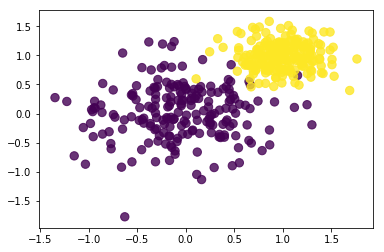

In [54]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [103]:
!wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy

--2023-01-11 17:00:05--  https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18, 198.51.44.6, 198.51.45.6, ...
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/hgnvyj9abatk8g6/residuals_261.npy [following]
--2023-01-11 17:00:06--  https://www.dropbox.com/s/raw/hgnvyj9abatk8g6/residuals_261.npy
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8d96aa138b1531a76ec64adcc5.dl.dropboxusercontent.com/cd/0/inline/B0W61OdphXoMQKv2exop4NbHw59GkLSh7KK_6iKqv84YIgJ9pPbmueKlgbu-msxGIzcZinTRsTnJ17HaCyyFVfr5JKBDq8C26oqkEfICPZH6fRvDkMv2Yg_R-5blnYPXAH_tK9jS7sJE5qr_KOk8B-0Q4QAH1d1NqxJXwx77IhJr1g/file# [following]
--2023-01-11 17:00:06--  https://uc8d96aa138b1531a76ec64adcc5.dl.dropboxusercontent.com/cd/0/inline/B0W61OdphXoMQKv2exop4NbHw59GkLSh7KK_6iKqv84YIgJ9pPbmueKlgbu-

In [105]:
data=np.load("residuals_261.npy",allow_pickle=True)

In [109]:
data=pd.DataFrame(data.item())

In [110]:
data

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
2,-7.200000,3.4
3,-4.150000,8.4
4,-6.590000,1.7
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


In [116]:
data_cl=data[abs(data['residuals'])<2]

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
8,-0.042857,3.3
9,0.128571,5.3
10,0.085714,15.0
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


In [118]:
lin_regr=scipy.stats.linregress(data_cl['distances'],data_cl['residuals'])


In [120]:
import seaborn as sns

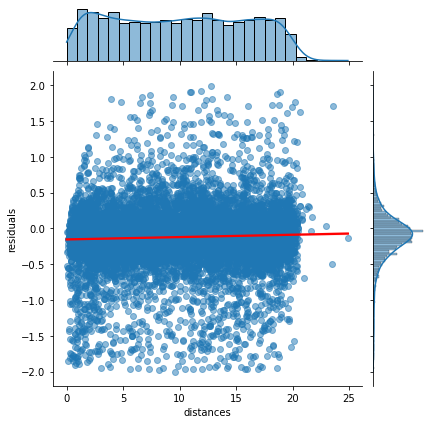

In [138]:
sns.jointplot(data=data_cl,x=data_cl['distances'],y=data_cl['residuals'],kind='reg',palette='set2',line_kws={"color": "red"},scatter_kws={'alpha':0.5})

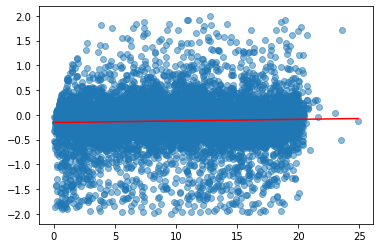

In [137]:
plt.scatter(x=data_cl['distances'],y=data_cl['residuals'],alpha=0.5)
plt.plot(x,lin_regr.slope*x+lin_regr.intercept,color='r')

In [177]:
step=0.5
X=(np.arange(0,20,step)+np.arange(0+step,20+step,step))/2
mean_value=np.zeros(len(X))
errY=np.zeros(len(X))
for i in range(len(X)):
    data_bin=data_cl[(data_cl['distances']>=X[i]-step/2) & (data_cl['distances']<X[i]+step/2)]
    mean_value[i]=np.mean(data_bin['residuals'])
    errY[i]=np.std(data_bin['residuals'])
Y=mean_value


In [178]:
errY

array([0.4504482 , 0.49694179, 0.42483367, 0.43051083, 0.40753291,
       0.44238307, 0.36975893, 0.44866245, 0.40331924, 0.3739492 ,
       0.35635748, 0.42103934, 0.47614161, 0.41057274, 0.5256219 ,
       0.37491067, 0.42474594, 0.46230608, 0.42113781, 0.38613865,
       0.44964453, 0.42827113, 0.48645196, 0.47456603, 0.47654904,
       0.52934113, 0.46332907, 0.44810445, 0.44015191, 0.46189223,
       0.46087092, 0.45291419, 0.4670922 , 0.38290308, 0.4355628 ,
       0.41548766, 0.41755385, 0.40116839, 0.38213979, 0.37787642])

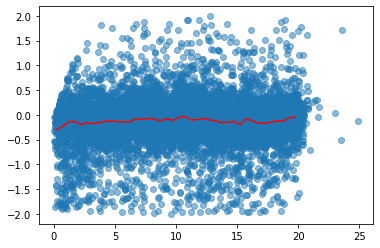

In [184]:
plt.plot(X,Y,color='r')
plt.scatter(x=data_cl['distances'],y=data_cl['residuals'],alpha=0.5)